# 条件随机场

## 马尔可夫过程

### 定义

假设一个随机过程中，$t_n$ 时刻的状态$x_n$的条件发布，只与其前一状态$x_{n-1}$ 相关，即：

$$
    P(x_n|x_1,x_2,...,x_{n-1}) = P(x_n|x_{n-1})
$$

则将其称为 马尔可夫过程。

![](img/马尔可夫过程.png)


## 隐马尔科夫算法

### 定义

隐马尔科夫算法是对含有未知参数（隐状态）的马尔可夫链进行建模的生成模型，如下图所示：

![](img/隐马尔科夫算法.png)

在隐马尔科夫模型中，包含隐状态 和 观察状态，隐状态 $x_i$ 对于观察者而言是不可见的，而观察状态 $y_i$ 对于观察者而言是可见的。隐状态间存在转移概率，隐状态 $x_i$到对应的观察状态 $y_i$ 间存在输出概率。


### 假设

1. 假设隐状态$x_i$ 的状态满足马尔可夫过程，i时刻的状态$x_i$ 的条件分布，仅与其前一个状态$x_{i-1}$相关，即：

$$
    P(x_i|x_1,x_2,...,x_{i-1}) = P(x_i|x_{i-1})
$$

2. 假设观测序列中各个状态仅取决于它所对应的隐状态，即：

$$
    P(y_i|x_1,x_2,...,x_{i-1},y_1,y_2,...,y_{i-1},y_{i+1},...) = P(y_i|x_{i})
$$

### 存在问题

在序列标注问题中，隐状态（标注）不仅和单个观测状态相关，还和观察序列的长度、上下文等信息相关。例如词性标注问题中，一个词被标注为动词还是名词，不仅与它本身以及它前一个词的标注有关，还依赖于上下文中的其他词。

## 条件随机场 （以线性链条件随机场为例）

### 定义

给定 $X=(x_1,x_2,...,x_n)$ ，$Y=(y_1,y_2,...,y_n)$ 均为线性链表示的随机变量序列，若在给随机变量序列 X 的条件下，随机变量序列 Y 的条件概率分布 $P(Y|X)$ 构成条件随机场，即满足马尔可夫性：

$$
    P(y_i|x_1,x_2,...,x_{i-1},y_1,y_2,...,y_{i-1},y_{i+1})
       = P(y_i|x,y_{i-1},y_{i+1})
$$

则称为 P(Y|X) 为线性链条件随机场。

通过去除了隐马尔科夫算法中的观测状态相互独立假设，使算法在计算当前隐状态$x_i$时，会考虑整个观测序列，从而获得更高的表达能力，并进行全局归一化解决标注偏置问题。


![条件随机场图片](img/条件随机场.png)


#### 参数化形式

$$
p\left(y | x\right)=\frac{1}{Z\left(x\right)} \prod_{i=1}^{n} \exp \left(\sum_{i, k} \lambda_{k} t_{k}\left(y_{i-1}, y_{i}, x, i\right)+\sum_{i, l} \mu_{l} s_{l}\left(y_{i}, x, i\right)\right)
$$

其中：

> $Z(x)$ 为归一化因子，是在全局范围进行归一化，枚举了整个隐状态序列$x_{1…n}$的全部可能，从而解决了局部归一化带来的标注偏置问题。

$$
Z(x)=\sum_{y} \exp \left(\sum_{i, k} \lambda_{x} t_{k}\left(y_{i-1}, y_{i}, x, i\right)+\sum_{i, l} \mu_{l} s_{l}\left(y_{i}, x, i\right)\right)
$$

> $t_k$ 为定义在边上的特征函数，转移特征，依赖于前一个和当前位置

> $s_1$ 为定义在节点上的特征函数，状态特征，依赖于当前位置。

#### 简化形式

因为条件随机场中同一特征在各个位置都有定义，所以可以对同一个特征在各个位置求和，将局部特征函数转化为一个全局特征函数，这样就可以将条件随机场写成权值向量和特征向量的内积形式，即条件随机场的简化形式。

##### step 1

将转移特征和状态特征及其权值用统一的符号表示，设有k1个转移特征，$k_2$个状态特征，$K=k_1+k_2$,记

 <img src="img/简化形式1.png" width = "500" height = "200" alt="图片名称" align=center />

##### step 2

对转移与状态特征在各个位置i求和，记作

 <img src="img/简化形式2.png" width = "400" height = "200" alt="图片名称" align=center />

##### step 3

将 $\lambda_{x}$ 和 $\mu_{l}$ 用统一的权重表示，记作

 <img src="img/简化形式3.png" width = "300" height = "200" alt="图片名称" align=center />

##### step 4

转化后的条件随机场可表示为：

 <img src="img/简化形式4.png" width = "250" height = "200" alt="图片名称" align=center />

##### step 5

若 $w$ 表示权重向量：

$$
    w = (w_1,w_2,...,w_K)^T
$$

以 $F(y,x)$ 表示特征向量，即

 <img src="img/简化形式5.png" width = "350" height = "200" alt="图片名称" align=center />

则，条件随机场写成内积形式为：

 <img src="img/简化形式6.png" width = "200" height = "200" alt="图片名称" align=center />


#### 矩阵形式

> 推导 begin




> 推导 end

### 基本问题

条件随机场包含概率计算问题、学习问题和预测问题三个问题。

> 1. 概率计算问题：已知模型的所有参数，计算观测序列 $Y$ 出现的概率，常用方法：前向和后向算法；

> 2. 学习问题：已知观测序列 $Y$，求解使得该观测序列概率最大的模型参数，包括隐状态序列、隐状态间的转移概率分布和从隐状态到观测状态的概率分布，常用方法：Baum-Wehch 算法；

> 3. 预测问题：一直模型所有参数和观测序列 $Y$ ，计算最可能的隐状态序列 $X$,常用算法：维特比算法。

#### 概率计算问题

> 给定条件随机场$P(Y|X)$，输入序列 $x$ 和 输出序列 $y$;

> 计算条件概率

$$
    P(Y_i=y_i|x), P(Y_{i-1} = y_{i-1},Y_i = y_i|x)
$$

> 计算相应的数学期望问题；

##### 前向-后向算法

###### step 1 前向计算

对观测序列 $x$ 的每个位置 $i=1,2,...,n+1$ ，定义一个 $m$ 阶矩阵（$m$ 为标记$Y_i$取值的个数）

 <img src="img/前向后向10.png" width = "350" height = "200" alt="图片名称" align=center />

对每个指标 $i=0,1,...,n+1$，定义前向向量 $\alpha_{i}(x)$，则递推公式:

 <img src="img/前向后向1.png" width = "450" height = "200" alt="图片名称" align=center />

其中，

 <img src="img/前向后向2.png" width = "250" height = "200" alt="图片名称" align=center />
 
 

###### step 2 后向计算

对每个指标 $i=0,1,...,n+1$，定义前向向量 $\beta_{i}(x)$，则递推公式:

<img src="img/前向后向3.png" width = "350" height = "200" alt="图片名称" align=center />
 
<img src="img/前向后向4.png" width = "350" height = "200" alt="图片名称" align=center />


###### step 3

 <img src="img/前向后向5.png" width = "250" height = "200" alt="图片名称" align=center />

###### step 4 概率计算

所以，标注序列在位置 $i$ 是标注 $y_i$ 的条件概率为：

<img src="img/前向后向6.png" width = "350" height = "200" alt="图片名称" align=center />
 
<img src="img/前向后向7.png" width = "500" height = "200" alt="图片名称" align=center />

其中，

<img src="img/前向后向8.png" width = "150" height = "200" alt="图片名称" align=center />

###### step 5 期望值计算

通过利用前向-后向向量，计算特征函数关于联合概率分布 $P(X,Y)$ 和 条件概率分布 $P(Y|X)$ 的数学期望，即特征函数 $f_k$ 关于条件概率分布 $P(Y|X)$ 的数学期望：

<img src="img/前向后向9.png" width = "500" height = "200" alt="图片名称" align=center />

其中：

<img src="img/前向后向8.png" width = "150" height = "200" alt="图片名称" align=center />


#### 学习问题

BFGS算法被认为是数值效果最好的拟牛顿法，并且具有全局收敛性和超线性收敛速度。

牛顿法的特点是：收敛速度快，迭代次数少，但是当Hessian矩阵很稠密时，每次迭代的计算量很大。

    随着数据规模的增大，那么Hessian矩阵会越大，需要的存储空间会增多，计算量也会增大，有时候大到不可计算，所以针对海量数据的计算，牛顿法不再适用。

    拟牛顿法是在牛顿法的基础上引入了Hessian矩阵的近似矩阵，避免每次迭代都计算Hessian矩阵的逆，它的收敛速度介于梯度下降法和牛顿法之间。
    
    拟牛顿法跟牛顿法一样，也是不能处理太大规模的数据，因为计算量和存储空间会开销很多。
    
    拟牛顿法虽然每次迭代不像牛顿法那样保证是最优化的方向，但是近似矩阵始终是正定的，因此算法始终是朝着最优化的方向在搜索。


拟牛顿法的基本思想是在牛顿法中用Hessian矩阵的某个近似矩阵来代替它。对于拟牛顿法来说，构造二次模型。如下
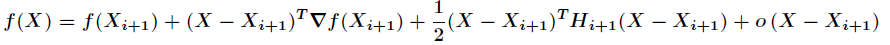
忽略高阶无穷小部分，进行求导得到

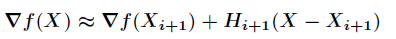

令：

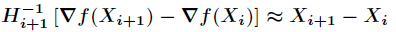

牛顿迭代中，要求Hessian矩阵的逆，计算量增大，而拟牛顿法是用Hessian矩阵的逆矩阵来代替Hessian矩阵。即如下迭代式


1、DFP算法时间复杂度O（$n^2$）



这里主要介绍一下 BFGS 算法的思路。


   输入：特征函数 $f_1,f_2,...,f_n$：经验分布 $\widetilde{P}(X,Y)$；
   
   输出：最优参数值 $\widehat{w}$，最优模型$P_{\widehat{w}}(y|x)$。
   
   1. 选定初始点 w^{(0)}， 取 $B_0$ 为正定对称矩阵，k = 0;
   2. 计算 $g_k = g(w^(k))$，若 $g_k = 0$ ，则停止计算，否则转 (3) ；
   3. 利用 $B_k p_k = -g_k$ 计算 $p_k$；
   4. 一维搜索：求 $\lambda_k$使得
   
   <img src="img/学习问题1.png" width = "300" height = "200" alt="图片名称" align=center />
   
   5. 设 $w^{(k+1)} = w^{(k)} + \lambda_k * p_k$
   6. 计算 $g_{k+1}$ = g(w^{(k+1)}),
   
       若 $g_k = 0$， 则停止计算；否则，利用下面公式计算 $B_{k+1}$:
       
       <img src="img/学习问题2.png" width = "300" height = "200" alt="图片名称" align=center />
       
   7. 令 $k=k+1$，转步骤（3）；


In [1]:
# BFGS的简洁实现
from scipy.optimize import fmin, fmin_bfgs
def fuc(x):
    return x**2 + 6
def FMIN():
    x = [1.0]
    return fmin(fuc, x)
def BFGS():
    x = [1.0]
    return fmin_bfgs(fuc, x)
FMIN()
BFGS()

Optimization terminated successfully.
         Current function value: 6.000000
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 6.000000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 3


array([-9.44232006e-09])

#### 预测问题

    维特比算法 (Viterbi algorithm) 是机器学习中应用非常广泛的动态规划算法，在求解隐马尔科夫、条件随机场的预测以及seq2seq模型概率计算等问题中均用到了该算法。实际上，维特比算法不仅是很多自然语言处理的解码算法，也是现代数字通信中使用最频繁的算法。

对于预测问题，常用的方法是维特比算法，其思路如下：

输入：模型特征向量 $F(y,x)$ 和权重向量 $w$，输入序列（观测序列） $x={x_1,x_2,...,x_n}$；

输出：条件概率最大的输出序列（标记序列）$y^{*}= (y_1^*,y_2^*,...,y_n^*)$，也就是最优路径；

1. 初始化

<img src="img/预测1.png" width = "350" height = "200" alt="图片名称" align=center />
  
2. 递推，对$i=2,3,...,n$

<img src="img/预测2.png" width = "450" height = "200" alt="图片名称" align=center />

3. 终止

<img src="img/预测3.png" width = "200" height = "200" alt="图片名称" align=center />

4. 返回路径

<img src="img/预测4.png" width = "350" height = "200" alt="图片名称" align=center />

求得最优路径 $y^{*}= (y_1^*,y_2^*,...,y_n^*)$

##### 例子说明

利用维特比算法计算给定输入序列$x$ 对应的最优输出序列$y^*$：

<img src="img/预测5.png" width = "200" height = "200" alt="图片名称" align=center />

1. 初始化

<img src="img/预测6.png" width = "350" height = "200" alt="图片名称" align=center />
  
2. 递推，对$i=2,3,...,n$

<img src="img/预测11.png" width = "450" height = "200" alt="图片名称" align=center />

<img src="img/预测8.png" width = "500" height = "200" alt="图片名称" align=center />

3. 终止

<img src="img/预测9.png" width = "350" height = "200" alt="图片名称" align=center />

4. 返回路径

<img src="img/预测10.png" width = "200" height = "200" alt="图片名称" align=center />

求得最优路径 $y^{*}= (y_1^*,y_2^*,...,y_n^*) = (1,2,1)$

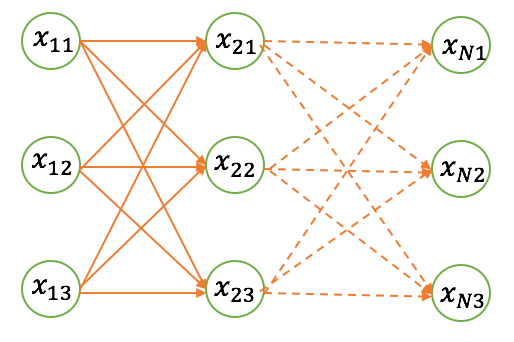

    隐马尔科夫的预测问题就是要求图中的一条路径，使得该路径对应的概率值最大。 对应上图来讲，假设每个时刻x可能取的值为3，如果直接求的话，有3^N的组合数，底数3为篱笆网络宽度，指数N为篱笆网络的长度，计算量非常大。维特比利用动态规划的思想来求解概率最大路径（可理解为求图最短路径），使得复杂度正比于序列长度，复杂度为O(N⋅D⋅D), N为长度，D为宽度，从而很好地解决了问题的求解。


1、如果概率最大的路径经过篱笆网络的某点，则从开始点到该点的子路径也一定是从开始到该点路径中概率最大的。 

2、假定第i时刻有k个状态，从开始到i时刻的k个状态有k条最短路径，而最终的最短路径必然经过其中的一条。 

3、根据上述性质，在计算第i+1状态的最短路径时，只需要考虑从开始到当前的k个状态值的最短路径和当前状态值到第i+1状态值的最短路径即可，如求t=3时的最短路径，等于求t=2时的所有状态结点x2i的最短路径加上t=2到t=3的各节点的最短路径。


    根据篱笆网的长度一步一步的求出当前状态下的最优路径，最后拼接起来

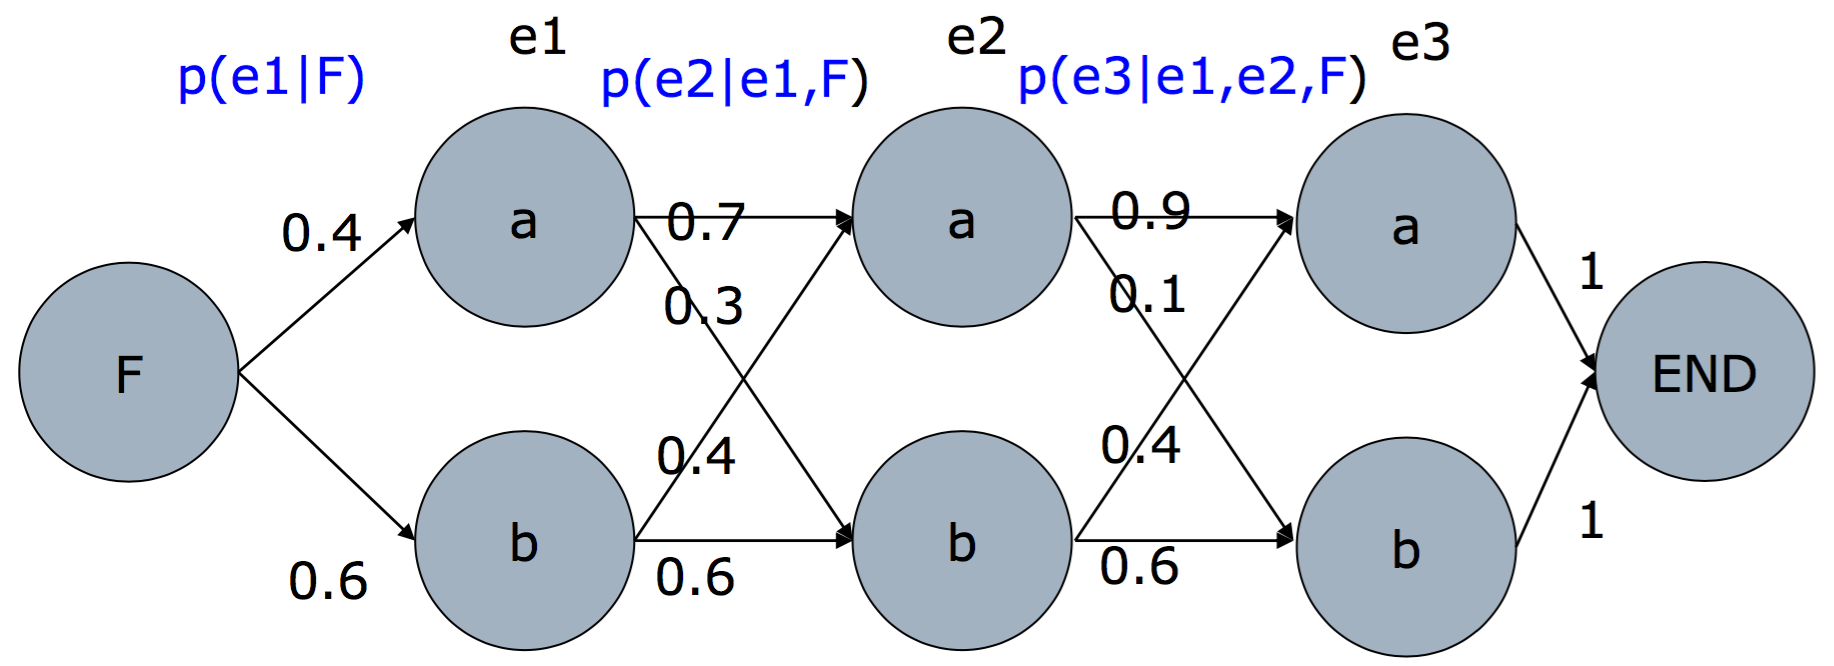

在这时使用维特比算法，其主要的思想为：
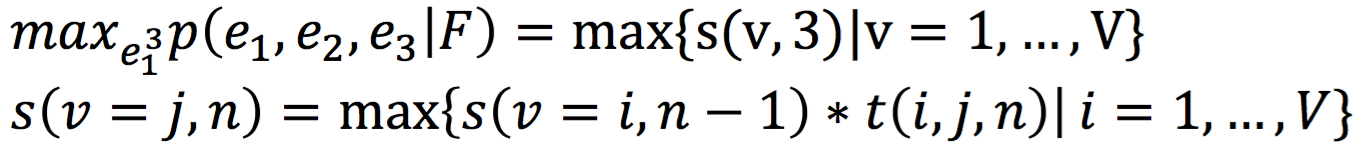

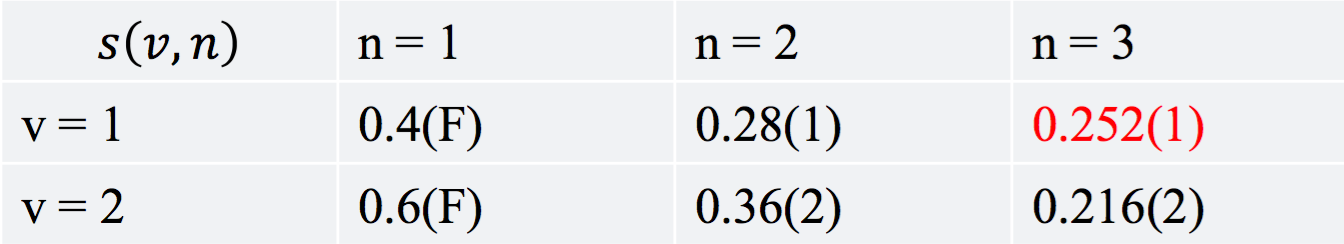

    直接删除掉n=i时候的小值，保留最大的概率
    最终的输出序列为（1,1,1）即AAA

In [2]:
import numpy as np
 
class CRF(object):
    '''实现条件随机场预测问题的维特比算法
    '''
    def __init__(self, V, VW, E, EW):
        '''
        :param V:是定义在节点上的特征函数，称为状态特征
        :param VW:是V对应的权值
        :param E:是定义在边上的特征函数，称为转移特征
        :param EW:是E对应的权值
        '''
        self.V  = V  #点分布表
        self.VW = VW #点权值表
        self.E  = E  #边分布表
        self.EW = EW #边权值表
        self.D  = [] #Delta表，最大非规范化概率的局部状态路径概率
        self.P  = [] #Psi表，当前状态和最优前导状态的索引表s
        self.BP = [] #BestPath，最优路径
        return 
        
    def Viterbi(self):
        '''
        条件随机场预测问题的维特比算法，此算法一定要结合CRF参数化形式对应的状态路径图来理解，更容易理解.
        '''
        self.D = np.full(shape=(np.shape(self.V)), fill_value=.0)
        self.P = np.full(shape=(np.shape(self.V)), fill_value=.0)
        for i in range(np.shape(self.V)[0]):
            #初始化
            if 0 == i:
                # 对应位置相乘：状态概率与特征概率乘积                
                self.D[i] = np.multiply(self.V[i], self.VW[i])
                self.P[i] = np.array([0, 0])
                print('self.V[%d]='%i, self.V[i], 'self.VW[%d]='%i, self.VW[i], 'self.D[%d]='%i, self.D[i])
                print('self.P:', self.P)
                pass
            #递推求解布局最优状态路径
            else:
                for y in range(np.shape(self.V)[1]): #delta[i][y=1,2...]
                    for l in range(np.shape(self.V)[1]): #V[i-1][l=1,2...]分布表一排一排往后  V表示当前有几个状态
                        delta = 0.0
                        delta += self.D[i-1, l]                      #前导状态的最优状态路径的概率
                        delta += self.E[i-1][l,y]*self.EW[i-1][l,y]  #前导状态到当前状体的转移概率
                        delta += self.V[i,y]*self.VW[i,y]            #当前状态的概率
                        print('(x%d,y=%d)-->(x%d,y=%d):%.2f + %.2f + %.2f='%(i-1, l, i, y, \
                              self.D[i-1, l], \
                              self.E[i-1][l,y]*self.EW[i-1][l,y], \
                              self.V[i,y]*self.VW[i,y]), delta)
                        if delta > self.D[i, y]:
#                         if 0 == l or delta > self.D[i, y]:   感觉这里的0==l不会发生
                            self.D[i, y] = delta
                            self.P[i, y] = l
                    print('self.D[x%d,y=%d]=%.2f\n'%(i, y, self.D[i,y]))
        print('self.Delta:\n', self.D)
        print('self.Psi:\n', self.P)
        
        #返回，得到所有的最优前导状态
        N = np.shape(self.V)[0]
        self.BP = np.full(shape=(N,), fill_value=0.0)
        t_range = -1 * np.array(sorted(-1*np.arange(N)))
        for t in t_range:
            if N-1 == t:#得到最优状态
                self.BP[t] = np.argmax(self.D[-1])
            else: #得到最优前导状态
                self.BP[t] = self.P[t+1, int(self.BP[t+1])]
        
        #最优状态路径表现在存储的是状态的下标，我们执行存储值+1转换成示例中的状态值
        #也可以不用转换，只要你能理解，self.BP中存储的0是状态1就可以~~~~
        self.BP += 1
        
        print('最优状态路径为：', self.BP)
        return self.BP
        
def CRF_manual():   
    S = np.array([[1,1],   #X1:S(Y1=1), S(Y1=2)
                  [1,1],   #X2:S(Y2=1), S(Y2=2)
                  [1,1]])  #X3:S(Y3=1), S(Y3=1)
    SW = np.array([[1.0, 0.5], #X1:SW(Y1=1), SW(Y1=2)
                   [0.8, 0.5], #X2:SW(Y2=1), SW(Y2=2)
                   [0.8, 0.5]])#X3:SW(Y3=1), SW(Y3=1)
    E = np.array([[[1, 1],  #Edge:Y1=1--->(Y2=1, Y2=2)
                   [1, 0]], #Edge:Y1=2--->(Y2=1, Y2=2)
                  [[0, 1],  #Edge:Y2=1--->(Y3=1, Y3=2) 
                   [1, 1]]])#Edge:Y2=2--->(Y3=1, Y3=2)
    EW= np.array([[[0.6, 1],  #EdgeW:Y1=1--->(Y2=1, Y2=2)
                   [1, 0.0]], #EdgeW:Y1=2--->(Y2=1, Y2=2)
                  [[0.0, 1],  #EdgeW:Y2=1--->(Y3=1, Y3=2)
                   [1, 0.2]]])#EdgeW:Y2=2--->(Y3=1, Y3=2)
    
    crf = CRF(S, SW, E, EW)
    ret = crf.Viterbi()
    print('最优状态路径为:', ret)
    return
    
if __name__=='__main__':
    CRF_manual()


self.V[0]= [1 1] self.VW[0]= [1.  0.5] self.D[0]= [1.  0.5]
self.P: [[0. 0.]
 [0. 0.]
 [0. 0.]]
(x0,y=0)-->(x1,y=0):1.00 + 0.60 + 0.80= 2.4000000000000004
(x0,y=1)-->(x1,y=0):0.50 + 1.00 + 0.80= 2.3
self.D[x1,y=0]=2.40

(x0,y=0)-->(x1,y=1):1.00 + 1.00 + 0.50= 2.5
(x0,y=1)-->(x1,y=1):0.50 + 0.00 + 0.50= 1.0
self.D[x1,y=1]=2.50

(x1,y=0)-->(x2,y=0):2.40 + 0.00 + 0.80= 3.2
(x1,y=1)-->(x2,y=0):2.50 + 1.00 + 0.80= 4.3
self.D[x2,y=0]=4.30

(x1,y=0)-->(x2,y=1):2.40 + 1.00 + 0.50= 3.9000000000000004
(x1,y=1)-->(x2,y=1):2.50 + 0.20 + 0.50= 3.2
self.D[x2,y=1]=3.90

self.Delta:
 [[1.  0.5]
 [2.4 2.5]
 [4.3 3.9]]
self.Psi:
 [[0. 0.]
 [0. 0.]
 [1. 0.]]
最优状态路径为： [1. 2. 1.]
最优状态路径为: [1. 2. 1.]
